In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('netflix_titles.csv')

In [3]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df.country.value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [7]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

Data cleaning 

In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

The data requires cleaning as director, cast, country, date added, rating and duraction contains null values 

In [9]:
#dropping null values
df[['director', 'cast', 'country']]= df[['director','cast', 'country']].fillna('Empty')

In [10]:
df.dropna(axis=0, inplace=True)

In [11]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Empty,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Empty,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Empty,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Empty,Empty,Empty,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Empty,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Empty,Empty,Empty,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [12]:
#Year released 
df.release_year.unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

According to this dataset the year of release ranges from 1925-2021

In [13]:
#convert date_added to datetime 
df['date_added']= pd.to_datetime(df['date_added'])

In [14]:
date_added

NameError: name 'date_added' is not defined

In [ ]:
#the date in which the types were added
df['date_added'].value_counts()[:10]

According to the first 10 release date, the data shows that Netflix had the highest release date of movie to be January 1, 2020 of which 109 types were released

In [ ]:
df.info()

In [ ]:
#the year with the most release types(movies and Tv shows)
df.release_year.value_counts()[:10]

2018, has the most release of the tpes (movies and shows)

## Exploration of Data 

In [ ]:
#Determining the number of shows and movies
types = df.type.value_counts()

In [ ]:
types

In [ ]:
#Visualizing the content types
sns.barplot(x=types.index, y=types.values)  #
plt.xlabel('types')
plt.ylabel('Count')
plt.title('Ratio of TV Shows Versus Movies')
plt.show()

Who are the top 10 directors 

In [ ]:
directors= df.director.value_counts()[1:11]

In [ ]:
directors

In [ ]:
#Visualizing the top directors 
plt.figure(figsize=(10,9))
plt.pie(x=directors.values, labels=directors.index, autopct='%.2f%%')
plt.title('The Top 10 Movie Directors')
plt.show()

In [ ]:
df.info()

In [ ]:
#counts of the the types across the top 10 release years
top_10_release_years = df['release_year'].value_counts().index[:10]
plt.figure(figsize=(12, 8))
sns.countplot(x='type', hue='release_year', data=df[df['release_year'].isin(top_10_release_years)])
plt.title('Counts of Movie Types across Top 10 Release Years')
plt.xlabel('Type')
plt.ylabel('Count')
plt.legend(title='Release Year')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

Highlight from the graph:
Type: Movie and TV show 
According to the graph shown above, it can be seen that the movie type had the highest release than the TV shows 

We also deduce that the year 2017 and 2018 in the movie type had the highest release of movies while 2012 had the lowest movie released 

On the TV show, netflix released more TV shows in the year 2020 and the lowest in the year 2013

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='type', hue='director', data=df[df['director'].isin(directors.index)])
plt.title('Counts of Movie Types across Top 10 Directors')
plt.xlabel('Type')
plt.ylabel('Count')
plt.legend(title='Director')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

According to this dataset, the top ten directors did more of Movies than Tv Shows. Only Marcus Raboy had a Tv show. While Rajiv had the highestes Number of movie produced while steven spielberg had the lowest number of movie

In [ ]:
df.rating.value_counts()

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', hue='type', data=df)
plt.title('Counts of Ratings Among the Types')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Type')
plt.xticks(rotation=45)  
plt.show()

Movies
TV-MA - Has the largest group. This rating is given for films intended for adult audiences only and it is commonly used for in the movies. It can also be deduced that Netflix did more of TV-MA movies

TV-14 - The second largest group. The content of the film with this rating is not suitable for children under 14 years of age, also the rating is done majorly in the movies.

R - The film is not suitable for children under 17 years of age.

TV-shows: TV- MA shows had the highest count while in TV-G had the least

In [ ]:
top_15_release_years = df['release_year'].value_counts().index[:15]

sns.countplot(y='release_year', data=df[df['release_year'].isin(top_15_release_years)], palette='Set2', order=top_15_release_years)
plt.title('The years with the highest released Movies')
plt.xlabel('Count')
plt.ylabel('release_year')
plt.show()

In [ ]:
df.country.value_counts()

In [ ]:
country_counts = {}

# Assuming df['country'] contains strings representing countries separated by commas

countries = country.replace(' ', '')  # Remove spaces
countries = country.split(',')  # Split by comma to get a list of countries
for countries in country:
    if country in country_counts:
        country_counts[country] += 1
    else:
            country_counts[country] = 1
            print(country_counts)

In [ ]:
def count_countries(country):
    country_counts = {}  # Initialize an empty dictionary to store country counts

    country_str = country.replace(' ', '')  # Remove spaces from the country string
    country_list = country_str.split(',')  # Split the country string by commas to get a list of countries

    for country in country_list:
        if country in country_counts:
            country_counts[country] += 1  # Increment count if country is already in the dictionary
        else:
            country_counts[country] = 1  # Add country to dictionary with count 1 if it's not present
            
    return country_counts


In [ ]:
country_counts

In [ ]:
directors= df.director.value_counts()[1:11]

In [ ]:
cols = ['duration'] + ['type'] + ['country']
plt.figure(figsize=(18, 9))
# nomalize the color scale
sns.heatmap(df[cols].corr(), annot=True, cmap='PiYG', vmin=-1, vmax=1)
plt.title('Correlation between variables')
plt.show()

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.isnull().sum()

In [ ]:
df.isnull().sum().sum()

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='PiYG' )
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
fig = plt.figure(figsize =(10,10))
ax = sns.barplot(x = genre_names, y = genre_values)
ax.set_xticklabels(genre_names, rotation =70)
ax.set_ylabel('Count movies')
ax.set_xlabel('Genres')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='PiYG', vmin=-1, vmax=1, square=True, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap')
plt.show()

In [ ]:


msno.bar(nfdf)

In [ ]:
plt.figure(figsize=(12,8))
top_10_country = df[country].value_counts().index[:10]
df_netflix=sns.countplot(data=df_top_10_country, x='country', hue='type', palette='pastel')
plt.title('Count of Content Type available in the countries', fontsize=15, fontweight="bold")
ax.legend(loc='center left', bbox_to_anchor=(0.70,0.90),
          ncol=3, fancybox=True, shadow=True)
plt.xlabel('Country', fontsize=14)
plt.show()

In [ ]:
df

In [ ]:
df.country

In [ ]:
sns.pairplot(df, hue  = 'type')

In [18]:
Q1 = df['release_year'].quantile(0.25) 
Q3 = df['release_year'].quantile(0.75)
IQR = Q3 - Q1 #IQR stands for Inter quartile Range(IQR), i.e. difference between the 25th and 75th quantiles
lowOutlier = Q1 - 1.5 * IQR
highOutlier = Q3 + 1.5 * IQR
totalOutlier = ((df['release_year'] < lowOutlier) | (df['release_year'] > highOutlier)).sum()
print("Total Number of the Outliers in the release_year are {}".format(totalOutlier))

Total Number of the Outliers in the release_year are 717


In [19]:
df_filter = df[(df["release_year"] < highOutlier) & (df["release_year"] > lowOutlier)]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 892.7+ KB


In [21]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8009 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8009 non-null   object        
 1   type          8009 non-null   object        
 2   title         8009 non-null   object        
 3   director      8009 non-null   object        
 4   cast          8009 non-null   object        
 5   country       8009 non-null   object        
 6   date_added    8009 non-null   datetime64[ns]
 7   release_year  8009 non-null   int64         
 8   rating        8009 non-null   object        
 9   duration      8009 non-null   object        
 10  listed_in     8009 non-null   object        
 11  description   8009 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 813.4+ KB


In [23]:
sns.set_theme(style="whitegrid")

In [25]:
df_filter['type'].value_counts()

Movie      5427
TV Show    2582
Name: type, dtype: int64

In [27]:
df_country = df_filter['country'].value_counts().nlargest(11)
df_country

United States     2470
India              840
Empty              799
United Kingdom     394
Japan              222
South Korea        198
Canada             178
Spain              145
France             121
Mexico             103
Turkey             101
Name: country, dtype: int64

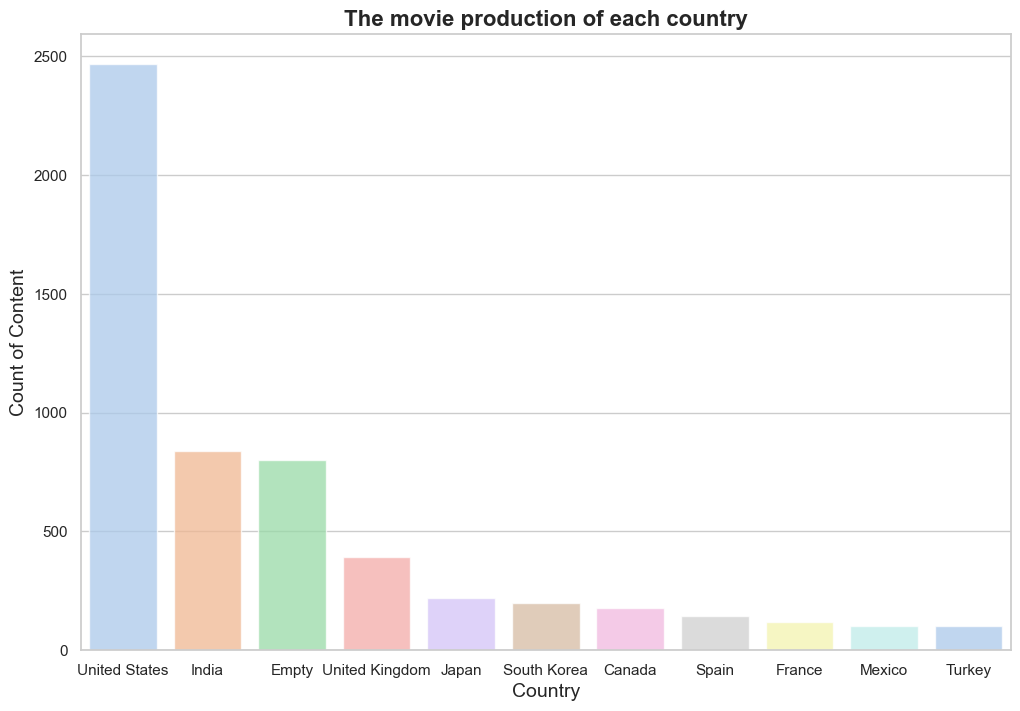

In [31]:
plt.figure(figsize=(12,8))
sns.barplot(x=df_country.index, y=df_country, alpha=0.75, palette='pastel')
plt.title('The movie production of each country', fontsize=16, fontweight="bold")
plt.ylabel('Count of Content',fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.xticks(fontsize=11)
plt.show()

The graph above shows United state to be one of the major producers of content and turkey been the least in the production of content on Netflix

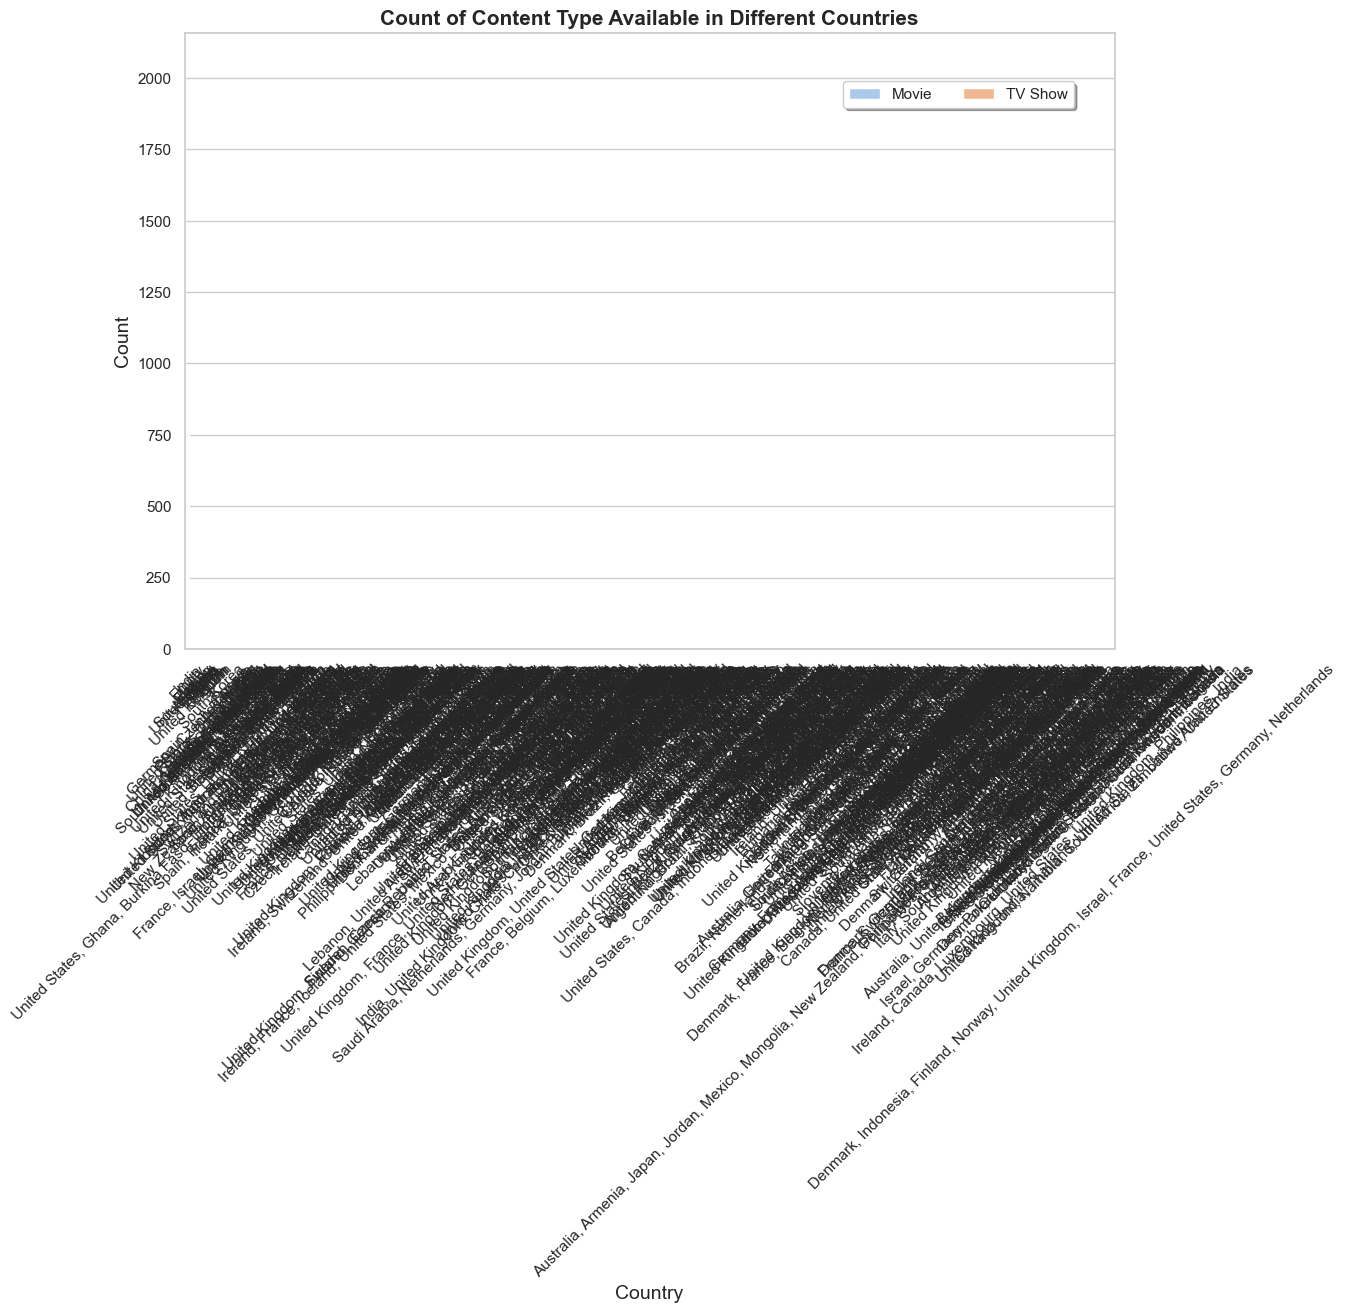

In [46]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='country', hue='type', palette='pastel')
plt.title('Count of Content Type Available in Different Countries', fontsize=15, fontweight="bold")
ax.legend(loc='center left', bbox_to_anchor=(0.70, 0.90), ncol=3, fancybox=True, shadow=True)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [44]:
msno.bar(df)

NameError: name 'msno' is not defined

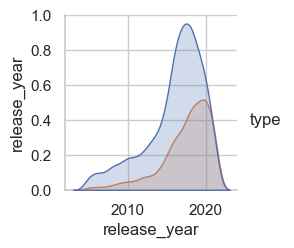

In [42]:
sns.pairplot(df_filter, hue  = 'type')
plt.show()

In [41]:
td_df_top_country = df_filter.query('country == ["United States", "India", "United Kingdom", "Japan", "South Korea", "Canada", "Spain", "France", "Mexico", "Turkey"]')
td_df_top_country.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Empty,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
4,s5,TV Show,Kota Factory,Empty,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
15,s16,TV Show,Dear White People,Empty,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,2021-09-22,2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...


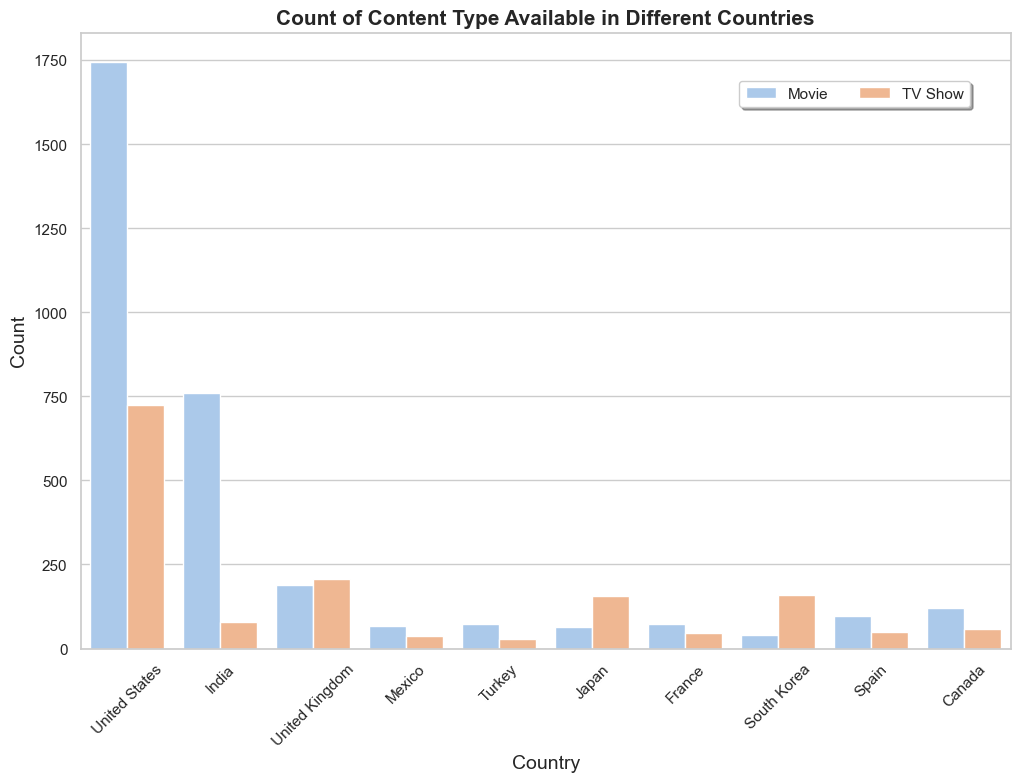

In [47]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=nfdf_top_country, x='country', hue='type', palette='pastel')
plt.title('Count of Content Type Available in Different Countries', fontsize=15, fontweight="bold")
ax.legend(loc='center left', bbox_to_anchor=(0.70, 0.90), ncol=3, fancybox=True, shadow=True)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

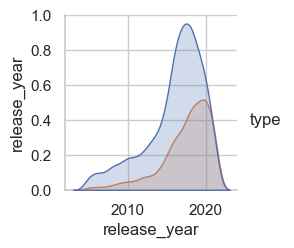

In [43]:
sns.pairplot(df_filter, hue  = 'type')
plt.show()